In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where

In [2]:
data = pd.read_csv('emails.csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [7]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load your dataset (replace 'your_dataset.csv' with your file)
df = pd.read_csv('emails.csv')

# Assuming your target variable is in a column named 'target'
target_column = 'Prediction'
X = df.drop(columns=[target_column, 'Email No.'])  # Exclude the target column if it's present

# Set a threshold for variance (e.g., 0.01)
variance_threshold = 0.1

# Initialize VarianceThreshold
selector = VarianceThreshold(threshold=variance_threshold)

# Fit the selector to your data
X_high_variance = selector.fit_transform(X)

# Get the selected features (columns) after dropping low/zero variance columns
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with the selected features
df_high_variance = df[selected_features]

# Optionally, you can add the target column back to the new DataFrame if needed
df_high_variance[target_column] = df[target_column]

# Save the cleaned dataset to a new CSV file (replace 'cleaned_dataset.csv' with your desired file name)
df_high_variance.to_csv('cleaned_dataset.csv', index=False)

df_high_variance


yes


,the,to,ect,and,for,of,a,you,hou,in,...,ml,ward,aren,tm,del,trial,ended,lay,ff,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,3,3,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,7,2,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,3,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,1,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,1,1,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,1


yes


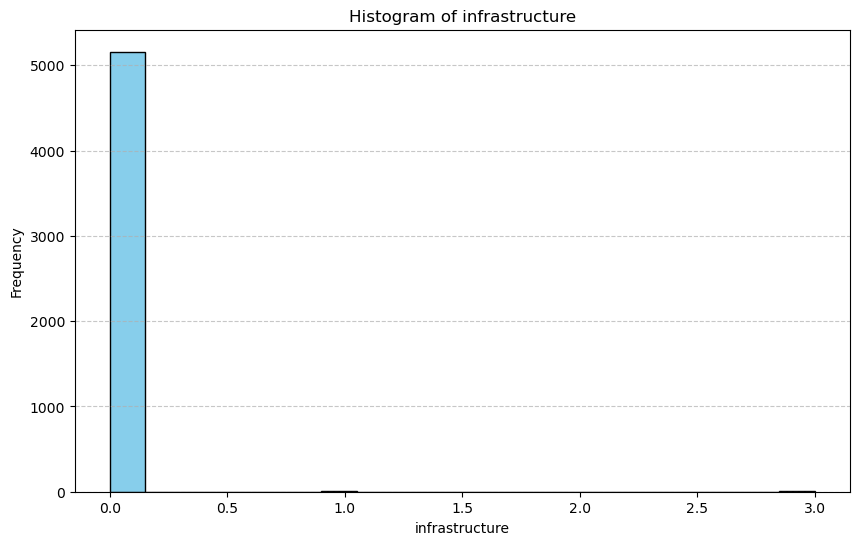

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

if 'infrastructure' not in selected_features:
    print('yes')

# Load your cleaned dataset (replace 'cleaned_dataset.csv' with the file generated in the previous step)
df_cleaned = pd.read_csv('emails.csv')

# Pick one of the dropped columns (replace 'dropped_column' with the actual column name)
dropped_column = 'infrastructure'

# Plot a histogram of the selected column
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned[dropped_column], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {dropped_column}')
plt.xlabel(dropped_column)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This column like this does no vary, so it does not contributes to the training. So we drop them.

In [10]:
import pandas as pd

# Load your cleaned dataset (replace 'cleaned_dataset.csv' with the actual file name)
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Specify the target column for correlation (replace 'Prediction' with your actual target column name)
target_column = 'Prediction'

# Calculate Pearson correlation with respect to the target column
correlation_with_target = df_cleaned.corr()[target_column]

# Print or visualize the correlation values
print("Pearson Correlation with respect to the target column:")
print(correlation_with_target)


Pearson Correlation with respect to the target column:
the          -0.004421
to            0.055277
ect          -0.120782
and           0.114364
for          -0.003101
                ...   
trial        -0.019594
ended        -0.017544
lay           0.064315
ff            0.135479
Prediction    1.000000
Name: Prediction, Length: 1022, dtype: float64


2. Correlation Coefficient:
Calculate the Pearson correlation coefficient for pairs of variables.
A high absolute value of the correlation coefficient (∣r∣) suggests a strong linear relationship, while values closer to 0 suggest a weaker or non-linear relationship.

In [17]:
import pandas as pd

# Load your cleaned dataset (replace 'cleaned_dataset.csv' with the actual file name)
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Specify the target column for correlation (replace 'Prediction' with your actual target column name)
target_column = 'Prediction'

# Calculate Pearson correlation with respect to the target column
correlation_with_target = df_cleaned.corr()[target_column]

# Drop the last row (correlation with itself)
correlation_with_target = correlation_with_target.drop(target_column, errors='ignore')

# Get the maximum absolute correlation value
max_corr_value = correlation_with_target.abs().max()

# Get the corresponding column name for the maximum correlation value
max_corr_column = correlation_with_target.abs().idxmax()

# Print the results
print(f"Maximum Absolute Correlation Value: {max_corr_value:.4f}")
print(f"Column Corresponding to Maximum Correlation: {max_corr_column}")


Maximum Absolute Correlation Value: 0.2714
Column Corresponding to Maximum Correlation: thanks


drop the 0/low variance columns
    then if the attribution, dimensionality reduction: pearison correlation/T-sne/PCA

find if data is linear or not
    and choose the approperiate model
